# EDA

## Configurações e Dataprep

In [1]:
## bibliotecas
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.eda import *
from utils.modelling_tools import *

In [2]:
## configurações

np.set_printoptions()
np.set_printoptions(precision=4, suppress=True)

pd.options.display.float_format = '{:.4f}'.format

%matplotlib inline
from matplotlib import rcParams

plt_params = {
    'figure.figsize':(6,4),
    'figure.dpi':75,
    'font.size':16,
    'font.family':'serif',
    'xtick.labelsize':14,
    'ytick.labelsize':14,
    'axes.labelsize':14,
    'legend.fontsize':10,
    'lines.linewidth':12,
    'grid.color':'gray',
    'savefig.bbox':'tight',
    'savefig.dpi':1000,
    'savefig.transparent':False,
}

rcParams.update(plt_params)

import warnings
warnings.filterwarnings('ignore')

seed = 123

%load_ext autoreload
%autoreload 2

In [3]:
## Carregando dataset
df_raw = pd.read_csv('data.csv', sep=';')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df_raw.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1000,94.7670,-50.8000,1.0310,4963.6000,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1000,94.7670,-50.8000,1.0280,4963.6000,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1000,94.7670,-50.8000,1.0280,4963.6000,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1000,94.7670,-50.8000,1.0280,4963.6000,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1000,94.7670,-50.8000,1.0280,4963.6000,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1000,94.7670,-50.8000,1.0280,4963.6000,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1000,94.7670,-50.8000,1.0280,4963.6000,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1000,94.7670,-50.8000,1.0280,4963.6000,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1000,94.7670,-50.8000,1.0280,4963.6000,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1000,94.7670,-50.8000,1.0280,4963.6000,no


In [5]:
## Definição da variável-resposta
actual_target = 'y'
df_raw[actual_target].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [6]:
## mapeando a variável-resposta para numeric
target_map = {'no':0, 'yes':1}
df_raw['target'] = df_raw[actual_target].map(target_map)

In [7]:
## Balanço das Classes
pd.concat([df_raw['target'].value_counts().rename('counts'),
          df_raw['target'].value_counts(normalize=True).rename('frequency')], axis=1)

,counts,frequency
target,,
0,36548,0.8873
1,4640,0.1127


In [8]:
## Separando bases de Treino e Teste

y = df_raw['target']
X = df_raw.drop('target', axis=1)

from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)

## dataset para estudo
df = pd.concat([X_train, pd.DataFrame(y_train, columns=['target'])], axis=1).reset_index(drop=True)

## dataset para teste OOS
df = pd.concat([X_test, pd.DataFrame(y_test, columns=['target'])], axis=1).reset_index(drop=True)

In [9]:
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
8228,38,blue-collar,married,basic.4y,unknown,yes,no,cellular,apr,thu,...,999,1,failure,-1.8000,93.0750,-47.1000,1.4100,5099.1000,no,0
8229,45,blue-collar,single,basic.9y,unknown,yes,no,cellular,may,tue,...,999,0,nonexistent,-1.8000,92.8930,-46.2000,1.3440,5099.1000,no,0
8230,42,management,married,basic.6y,no,yes,no,telephone,sep,thu,...,999,0,nonexistent,-3.4000,92.3790,-29.8000,0.7780,5017.5000,yes,1
8231,41,technician,divorced,basic.4y,no,yes,no,telephone,jun,fri,...,999,0,nonexistent,1.4000,94.4650,-41.8000,4.9670,5228.1000,no,0
8232,37,management,married,university.degree,unknown,no,no,cellular,aug,mon,...,999,0,nonexistent,1.4000,93.4440,-36.1000,4.9700,5228.1000,no,0
8233,48,blue-collar,divorced,high.school,unknown,no,yes,telephone,jul,mon,...,999,0,nonexistent,1.4000,93.9180,-42.7000,4.9620,5228.1000,no,0
8234,32,admin.,married,university.degree,no,yes,yes,cellular,nov,mon,...,999,0,nonexistent,-3.4000,92.6490,-30.1000,0.7220,5017.5000,no,0
8235,29,services,single,high.school,no,no,no,cellular,jun,wed,...,3,1,success,-2.9000,92.9630,-40.8000,1.2600,5076.2000,no,0
8236,57,retired,married,university.degree,no,yes,no,cellular,aug,mon,...,999,0,nonexistent,-2.9000,92.2010,-31.4000,0.8430,5076.2000,no,0
8237,36,blue-collar,married,high.school,unknown,yes,no,cellular,jul,mon,...,999,0,nonexistent,1.4000,93.9180,-42.7000,4.9600,5228.1000,no,0


## Analise Inicial do DF

#### Propriedades do DF

In [10]:
df.shape

(8238, 22)

In [11]:
df.sample(5).T

,6366,954,7775,7290,8198
age,32,22,36,59,38
job,blue-collar,student,blue-collar,admin.,admin.
marital,married,single,married,married,single
education,basic.4y,high.school,basic.6y,high.school,university.degree
default,no,no,no,no,no
housing,no,no,no,yes,no
loan,no,no,yes,no,no
contact,cellular,cellular,cellular,cellular,cellular
month,nov,sep,nov,apr,may
day_of_week,tue,wed,wed,wed,mon


#### Propriedades: Tipo, Cardinalidade, Missing

In [12]:
pd.concat([
    df.nunique(), df.isna().sum(), df.dtypes
], axis = 1).rename(columns={0:'Unicos', 1:'NaN', 2:'tipo'}).T

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
Unicos,76,12,4,8,2,3,3,2,10,5,...,22,8,3,10,26,26,270,11,2,2
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tipo,int64,object,object,object,object,object,object,object,object,object,...,int64,int64,object,float64,float64,float64,float64,float64,object,int64


In [13]:
if df.isna().sum().sum():
    missing_cols = list(df.columns[df.isna().sum() > 0])
    df[missing_cols].tail()

In [14]:
if df.isna().sum().sum():
    plt.figure(figsize=(15,8))
    sns.heatmap(df.isna(), cbar=False)
    plt.title('Distribuição dos NaN')
    plt.yticks([])

In [15]:
## Verificando linhas com NaN
if df.isna().sum().sum():
    for i in [0, 1,2,3,4,5]:
        missing_values = (df.isnull().sum(1)==i).sum()
        print(f'Linhas com {i} NaNs: {missing_values}')

In [16]:
index_nan = df.loc[df.isnull().sum(1)==1].index

if df.isna().sum().sum():
    df.iloc[index_nan.values,:].sample(5)

#### linhas duplicadas

In [17]:
print(f'Número de linhas duplicadas: {df.duplicated().sum()}')

Número de linhas duplicadas: 1


In [18]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
print(f'Número de linhas duplicadas: {df.duplicated().sum()}')

Número de linhas duplicadas: 0


#### Weight of Evidence e Information Value

In [19]:
iv_EDA, woe_EDA = iv_woe(data=df.drop('y', axis=1),
                         target='target',
                         bins=10, show_woe=False)

iv_EDA['Predictive Power'] = iv_EDA['IV'].map(predictive_power)

Information value of age is 0.183175
Information value of job is 0.169897
Information value of marital is 0.039985
Information value of education is 0.042476
Information value of default is 0.140474
Information value of housing is 0.002044
Information value of loan is 0.001344
Information value of contact is 0.219685
Information value of month is 0.484197
Information value of day_of_week is 0.013073
Information value of duration is 1.829669
Information value of campaign is 0.079793
Information value of pdays is 0.0
Information value of previous is 0.348575
Information value of poutcome is 0.552163
Information value of emp.var.rate is 1.135972
Information value of cons.price.idx is 0.636013
Information value of cons.conf.idx is 0.913963
Information value of euribor3m is 1.105007
Information value of nr.employed is 1.185722


In [20]:
iv_EDA.sort_values(by='IV', ascending=False)

,Variable,IV,Predictive Power
0,duration,1.8297,suspicious
0,nr.employed,1.1857,suspicious
0,emp.var.rate,1.1360,suspicious
0,euribor3m,1.1050,suspicious
0,cons.conf.idx,0.9140,suspicious
0,cons.price.idx,0.6360,suspicious
0,poutcome,0.5522,suspicious
0,month,0.4842,strong
0,previous,0.3486,strong
0,contact,0.2197,medium


## EDA - Numéricas

#### Estatistica Descritivas e Cardinalidade

In [21]:
numerics = ['int16','int32','int64','float16','float32','float64']
numeric_features = df.select_dtypes(include=numerics).columns
df[numeric_features].sample(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
2063,37,215,1,999,0,-0.1000,93.2000,-42.0000,4.1910,5195.8000,0
7213,31,178,3,999,0,1.4000,93.9180,-42.7000,4.9610,5228.1000,0
5453,51,81,1,999,0,1.4000,94.4650,-41.8000,4.9610,5228.1000,0
5770,37,196,2,999,1,-1.8000,93.0750,-47.1000,1.4050,5099.1000,0
6607,48,113,1,999,0,-3.4000,92.4310,-26.9000,0.7410,5017.5000,0


In [22]:
## Estatistica Descritivas
df[numeric_features].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,8237.0000,8237.0000,8237.0000,8237.0000,8237.0000,8237.0000,8237.0000,8237.0000,8237.0000,8237.0000,8237.0000
mean,39.9131,257.3546,2.6273,960.1842,0.1793,0.0980,93.5870,-40.5115,3.6317,5167.4523,0.1127
std,10.4626,258.3638,2.9726,192.4582,0.5180,1.5676,0.5799,4.5744,1.7342,72.1996,0.3162
min,17.0000,0.0000,1.0000,0.0000,0.0000,-3.4000,92.2010,-50.8000,0.6340,4963.6000,0.0000
25%,32.0000,102.0000,1.0000,999.0000,0.0000,-1.8000,93.0750,-42.7000,1.3440,5099.1000,0.0000
50%,38.0000,178.0000,2.0000,999.0000,0.0000,1.1000,93.8760,-41.8000,4.8570,5191.0000,0.0000
75%,47.0000,319.0000,3.0000,999.0000,0.0000,1.4000,93.9940,-36.4000,4.9610,5228.1000,0.0000
max,98.0000,3422.0000,56.0000,999.0000,7.0000,1.4000,94.7670,-26.9000,5.0450,5228.1000,1.0000


In [23]:
## Cardinalidade
num_cardinal_col = []

for coluna in numeric_features:
    print(f'Coluna: {coluna}')
    if df[coluna].nunique() < 13:
        print(pd.concat([df[coluna].value_counts(dropna=False).rename('cont.'),
                        df[coluna].value_counts(dropna=False, normalize=True).rename('freq.')], axis=1))
        num_cardinal_col.append(coluna)
    else:
        print(f'Possui {df[coluna].nunique()} elementos distintos')
    print('-'*80)
    
print(f'Colunas com valores discretos: {num_cardinal_col}')

Coluna: age
Possui 76 elementos distintos
--------------------------------------------------------------------------------
Coluna: duration
Possui 1027 elementos distintos
--------------------------------------------------------------------------------
Coluna: campaign
Possui 37 elementos distintos
--------------------------------------------------------------------------------
Coluna: pdays
Possui 22 elementos distintos
--------------------------------------------------------------------------------
Coluna: previous
          cont.  freq.
previous              
0          7103 0.8623
1           896 0.1088
2           169 0.0205
3            44 0.0053
4            17 0.0021
5             6 0.0007
7             1 0.0001
6             1 0.0001
--------------------------------------------------------------------------------
Coluna: emp.var.rate
              cont.  freq.
emp.var.rate              
1.4000         3297 0.4003
-1.8000        1824 0.2214
1.1000         1563 0.1898
-0.1000   

#### Distribuição dos Dados 

In [24]:
## Dimensionando a Matriz
num_plots = len(numeric_features)

## Definindop o tamanho da matriz dos histogramas e outliers
ncols = 3
nrows = int(np.ceil(num_plots/ncols))

num_plots, ncols, nrows

(11, 3, 4)

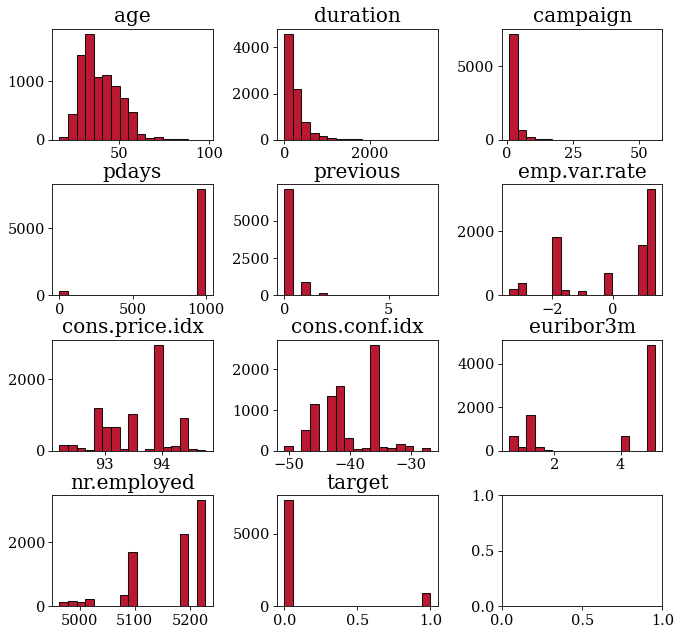

In [25]:
i_row = 0 
fig, ax = plt.subplots(nrows, ncols, figsize=(3.5*ncols, 2.5*nrows))
for i in range(nrows):
    for j in range(ncols):
        if i_row < num_plots:
            ax[i][j].hist(df[numeric_features[i_row]], bins=17,
                          edgecolor='black', color=[0.7,0,.1], alpha=0.9);
            ax[i][j].set_title(numeric_features[i_row]);
            i_row += 1
            
fig.subplots_adjust(hspace=0.4, wspace=0.4)

count   8237.0000
mean     257.3546
std      258.3638
min        0.0000
25%      102.0000
50%      178.0000
75%      319.0000
max     3422.0000
Name: duration, dtype: float64


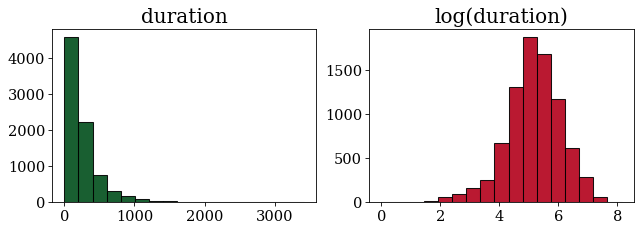

In [26]:
## Analise pora feature engineering log

i_row = 1 
descritiva = df[numeric_features[i_row]].describe()
print(descritiva)
if descritiva['min'] == 0 : shift=1; ## log(0) diverge, logo usa-se shift=1 para evitar erro na transformação
else: shift = 0;

## Histogramas
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(df[numeric_features[i_row]], bins=17, edgecolor='black', color=[0,.3,.1], alpha=0.9);
plt.title(numeric_features[i_row]);

plt.subplot(1,2,2)
log_feature = np.log(df[numeric_features[i_row]]+shift)
plt.hist(log_feature, bins=17, edgecolor='black', color=[.7,0,.1], alpha=0.9);
plt.title(f'log({numeric_features[i_row]})');


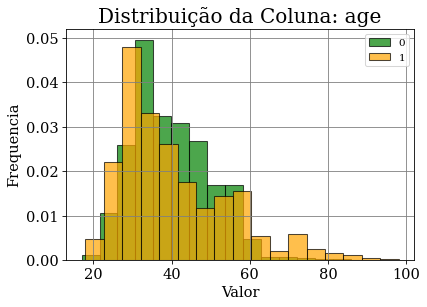

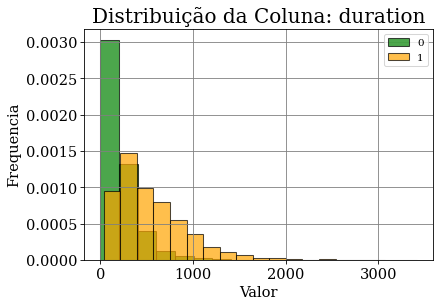

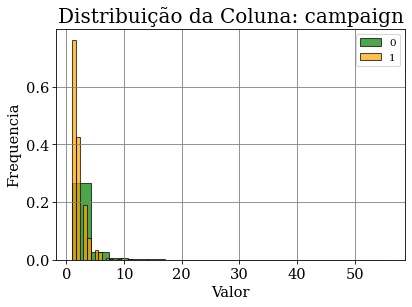

In [27]:
## Histograma por Classe
colunas = ['age', 'duration', 'campaign']

group_name = df['target'].unique()
colors = ['green', 'orange']

for coluna in colunas:
    for i, group in enumerate(group_name):
        ax = df[df['target'] == group][coluna].hist(figsize=(6,4),
                                            edgecolor='black',
                                            bins=17,
                                            density=1,
                                            alpha=0.7,
                                            color=colors[i]
                                            )
    ax.legend(group_name)
    
    ax.set_title(f'Distribuição da Coluna: {coluna}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequencia')
    
    plt.show();

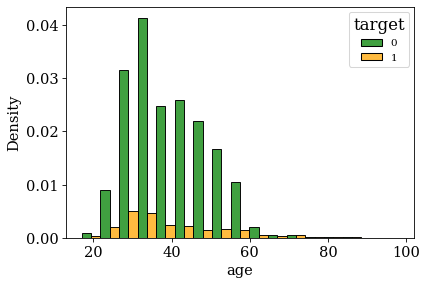

In [28]:
sns.histplot(data=df, x='age', hue='target', bins=17, multiple='dodge', stat='density', palette=colors);
## multiple == ['layer', 'stack', 'fill', 'dodge']

#### Outliers

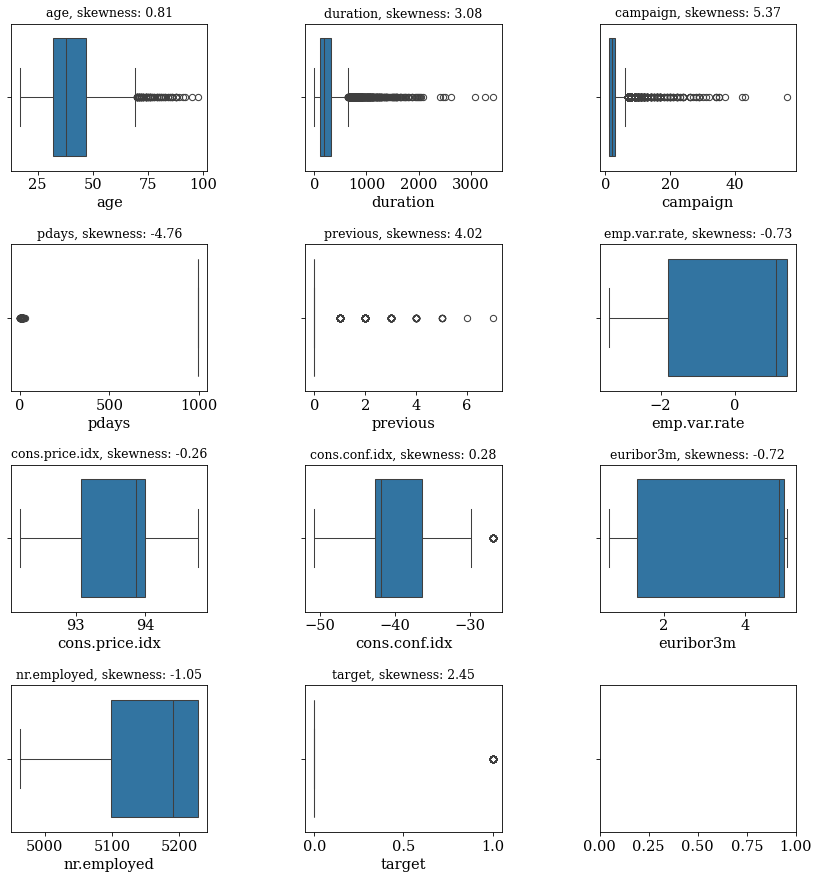

In [35]:
custom_boxplot(df, numeric_features, nrows, ncols)

In [37]:
idx_lst = [0,1,2] ## features a serem analisadas

## Dimensionando a Matriz
num_plots = len(idx_lst)

## Definindop o tamanho da matriz dos histogramas e outliers
ncols = 3
nrows = int(np.ceil(num_plots/ncols))

num_plots, ncols, nrows

(3, 3, 1)

Coluna: age
Observations: 8237
Outliers: 98, 1.19% 
Interquartile Distance: 15.0000
Lower Limit, Upper Limit: [9.50, 69.50]
Minimum, Maximum: [17.00, 98.00]
--------------------------------------------------------------------------------
Coluna: duration
Observations: 8237
Outliers: 584, 7.09% 
Interquartile Distance: 217.0000
Lower Limit, Upper Limit: [-223.50, 644.50]
Minimum, Maximum: [0.00, 3422.00]
--------------------------------------------------------------------------------
Coluna: campaign
Observations: 8237
Outliers: 489, 5.94% 
Interquartile Distance: 2.0000
Lower Limit, Upper Limit: [-2.00, 6.00]
Minimum, Maximum: [1.00, 56.00]
--------------------------------------------------------------------------------


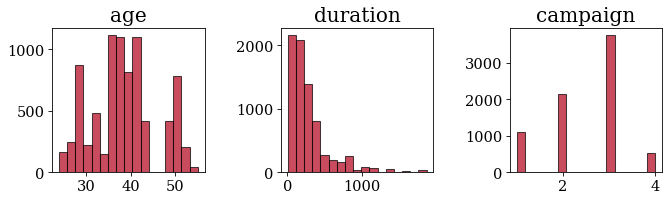

In [41]:
i_row = 0

fig, ax = plt.subplots(nrows, ncols, figsize=(3.5*ncols,2.5*nrows))

for i in range(nrows):
    for j in range(ncols):
        if i_row < num_plots:
            print(f'Coluna: {numeric_features[idx_lst[i_row]]}')
            idx_outl = outliers_filter(df[numeric_features[idx_lst[i_row]]].values, True)
            ax[j].hist(df.loc[idx_outl, numeric_features[i_row]], bins=17,
                       edgecolor='black', color=[.7, 0, .1], alpha=.7)
            ax[j].set_title(numeric_features[i_row]);
            i_row += 1
            print('-'*80)
            
fig.subplots_adjust(hspace=0.5, wspace=0.5)    

Variável *age* não está com valores fora do padrão, no entanto, *duration* e *campaign* estão com valores maiores que o LS, se faz necessário entender o significado dessa variável para a área de negócio para decidir sobre os tratamentos

#### Análise de Correlação

Nessa etapa, ganhamos conhecimento sobre as variáveis antes de realizar qualquer tratamento.  
O comparativo entre as correlações antes e depoois do tratameno das variáveis ajuda a identificar possiveis alternativas para a feature engineering e feature selection, além de indicar se o tratamento realizado aumenta a correspondencia com outra variável.

##### Correlação de Pearson

Com a correlação linear alta, pode-se optar por aquela que tenha maior cardinalidade, ou estabelecer uma função que relaciona as duas variáveis.

In [44]:
numeric_correlation(df, numeric_features, method='pearson')

,level_0,level_1,pearson_Correlation
20,cons.price.idx,emp.var.rate,0.7717
33,euribor3m,emp.var.rate,0.9726
41,nr.employed,emp.var.rate,0.9048
44,nr.employed,euribor3m,0.9447


#####  Correlação de Spearman - Não Paramétrica (capaz de detectar relações não lineares)

In [45]:
## Correlações de Spearman
numeric_correlation(df, numeric_features, method='spearman')

,level_0,level_1,spearman_Correlation
33,euribor3m,emp.var.rate,0.9387
41,nr.employed,emp.var.rate,0.9465
44,nr.employed,euribor3m,0.9300


## EDA - Categóricas

#### EDA variáveis categoricas

In [30]:
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features].sample(5)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
8209,blue-collar,married,basic.9y,no,yes,no,cellular,nov,wed,nonexistent,no
2973,admin.,married,university.degree,no,yes,no,telephone,may,mon,nonexistent,no
4586,student,single,high.school,no,yes,no,cellular,may,mon,nonexistent,no
7442,admin.,single,university.degree,no,no,no,cellular,aug,fri,nonexistent,no
6509,admin.,married,unknown,unknown,no,no,cellular,aug,thu,nonexistent,no


In [46]:
## Cardinalidade
num_cardinal_col = []

for coluna in categorical_features:
    print(f'Coluna: {coluna}')
    if df[coluna].nunique() < 13:
        print(pd.concat([df[coluna].value_counts(dropna=False).rename('cont.'),
                        df[coluna].value_counts(dropna=False, normalize=True).rename('freq.')], axis=1))
        num_cardinal_col.append(coluna)
    else:
        print(f'Possui {df[coluna].nunique()} elementos distintos')
    print('-'*80)
    
print(f'Colunas com valores discretos: {num_cardinal_col}')

Coluna: job
               cont.  freq.
job                        
admin.          2114 0.2566
blue-collar     1787 0.2169
technician      1335 0.1621
services         795 0.0965
management       552 0.0670
retired          370 0.0449
entrepreneur     313 0.0380
self-employed    290 0.0352
housemaid        231 0.0280
unemployed       204 0.0248
student          188 0.0228
unknown           58 0.0070
--------------------------------------------------------------------------------
Coluna: marital
          cont.  freq.
marital               
married    4957 0.6018
single     2365 0.2871
divorced    900 0.1093
unknown      15 0.0018
--------------------------------------------------------------------------------
Coluna: education
                     cont.  freq.
education                        
university.degree     2491 0.3024
high.school           1880 0.2282
basic.9y              1194 0.1450
professional.course   1018 0.1236
basic.4y               854 0.1037
basic.6y               4

#### Densidade das Variáveis Categóricas por Classe

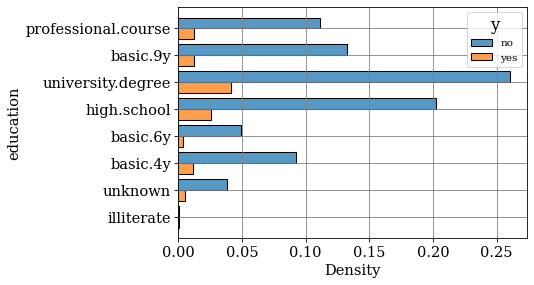

In [51]:
sns.histplot(data=df[categorical_features], y='education', hue='y', 
             multiple='dodge', shrink=0.8, stat='density');


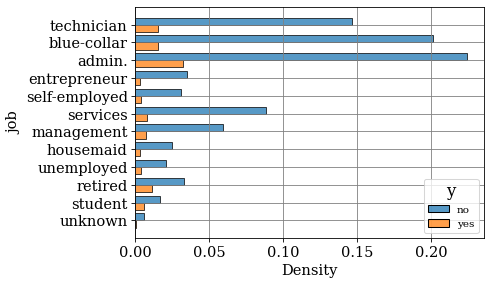

In [52]:
sns.histplot(data=df[categorical_features], y='job', hue='y', 
             multiple='dodge', shrink=0.8, stat='density');


#### Cramér's V test - Correlações entre variáveis categóricas

In [53]:
import scipy.stats as scis
from itertools import combinations

## função do V test

def cramers_v_test(dataset):
    chi2 = scis.chi2_contingency(dataset)
    
    if chi2[1] < 0.05:
        n = dataset.values.sum()
        return np.sqrt(chi2[0] / (n*(min(dataset.shape) -1 )))
    else: 
        return 0

In [56]:

pairwise_test = []

for var_i, var_j in combinations(range(len(categorical_features)), 2):
    cramer_val = cramers_v_test(
        pd.crosstab(df[categorical_features[var_i]], df[categorical_features[var_j]])
    )
    pairwise_test.append([categorical_features[var_i], categorical_features[var_j], cramer_val])
    
df_cramer = pd.DataFrame(pairwise_test, columns=['Var1', 'Var2', 'Cramer_Val'])

In [57]:
df_cramer.sort_values(by='Cramer_Val', ascending=False).head(5)

,Var1,Var2,Cramer_Val
34,housing,loan,0.7075
45,contact,month,0.6119
1,job,education,0.3597
54,poutcome,y,0.3200
51,month,y,0.2773
